In [1]:
#BaseMessage
from camel.messages import BaseMessage
from camel.types import RoleType
from PIL import Image
from io import BytesIO
import requests


img = Image.open(BytesIO(requests.get("https://raw.githubusercontent.com/camel-ai/camel/master/misc/logo_light.png").content))

new_user_message = BaseMessage(
    role_name="user_with_image",
    role_type=RoleType.USER,
    content="这是一个包含图像的消息",
    image_list=[img],  # 替换为实际图像URL
    meta_dict={}

)

new_user_message

BaseMessage(role_name='user_with_image', role_type=<RoleType.USER: 'user'>, meta_dict={}, content='这是一个包含图像的消息', video_bytes=None, image_list=[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=3520x720 at 0x70A8715C3190>], image_detail='auto', video_detail='low', parsed=None)

In [2]:
# 2.4.3 不同类型消息的处理

In [3]:
#创建用户信息和助手信息
user_message = BaseMessage.make_user_message(
    role_name="用户",
    content="你好，助手！这是一个文本消息。",
)

#创建助手消息
sys_message = BaseMessage.make_assistant_message(
    role_name ="助手",
    content="你好，用户！这是另一个文本消息。",
)
print(user_message)
print(sys_message)

BaseMessage(role_name='用户', role_type=<RoleType.USER: 'user'>, meta_dict=None, content='你好，助手！这是一个文本消息。', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)
BaseMessage(role_name='助手', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict=None, content='你好，用户！这是另一个文本消息。', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)


In [4]:
#基于原有消息改动消息
new_user_message = user_message.create_new_instance("content=这是一个更新后的文本消息。")
print(new_user_message)

BaseMessage(role_name='用户', role_type=<RoleType.USER: 'user'>, meta_dict=None, content='content=这是一个更新后的文本消息。', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)


In [5]:
#将消息转换为字典格式
msg_dic = new_user_message.to_dict()
print(msg_dic)

{'role_name': '用户', 'role_type': 'USER', 'content': 'content=这是一个更新后的文本消息。'}


In [10]:
#适配 OpenAI 后端的消息格式
from camel.types import OpenAIBackendRole

openai_user_msg = user_message.to_openai_message(role_at_backend=OpenAIBackendRole.USER)
print(openai_user_msg)
print("\n")
openai_assistant_msg = sys_message.to_openai_message(role_at_backend=OpenAIBackendRole.ASSISTANT)
print(openai_assistant_msg)
print("\n")
openai_assistant_msg = sys_message.to_openai_assistant_message()
print(openai_assistant_msg)


{'role': 'user', 'content': '你好，助手！这是一个文本消息。'}


{'role': 'assistant', 'content': '你好，用户！这是另一个文本消息。'}


{'role': 'assistant', 'content': '你好，用户！这是另一个文本消息。'}


In [11]:
# 2.4.4 与ChatAgent协作

In [18]:
from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType
from camel.messages import BaseMessage
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('ModelFactory_Key')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/QVQ-72B-Preview",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=api_key
)

# 创建系统消息，告诉ChatAgent自己的角色定位
system_msg = "You are a helpful assistant that responds to user queries."

# 实例化一个ChatAgent
chat_agent = ChatAgent(model=model, system_message=system_msg,output_language='zh')


# 将用户消息传给ChatAgent，并获取回复
# user_msg = "Hello! Can you tell me something about CAMEL AI?"
url1 = "https://img0.baidu.com/it/u=2205376118,3235587920&fm=253&fmt=auto&app=120&f=JPEG?w=846&h=800"
url2 = "https://raw.githubusercontent.com/camel-ai/camel/master/misc/logo_light.png"
img = Image.open(BytesIO(requests.get(url1).content))

user_msg = BaseMessage.make_user_message(
    role_name="user1",
    content="这张是什么图片",
    image_list = [img],
    meta_dict={"processing_time": 1.23, "api_version": "v2", "user_id": "1234567890"}
)

response = chat_agent.step(user_msg)

print("Assistant Response:", response.msgs[0].content)

2025-08-31 08:53:13,312 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.


Assistant Response: 这张图片是一只金毛寻回犬（Golden Retriever）的特写照片。金毛寻回犬是一种中大型犬种，以其友善、忠诚和易训练而闻名。它们通常具有金色或奶油色的被毛，这取决于具体的血统和基因。

在这张照片中，金毛寻回犬的毛发看起来非常健康和有光泽，呈现出一种丰富的金黄色调。它的耳朵垂挂在头部两侧，眼睛明亮而有神，透露出一种友善和热情的表情。狗的嘴巴微微张开，舌头伸出来，这通常是狗狗感到快乐或兴奋时的表现。

背景是模糊的，可能是一片自然景观，如公园或森林，这使得金毛寻回犬成为照片的焦点。整体的色彩调和温暖，给人一种温馨和愉悦的感觉。

金毛寻回犬是一种非常受欢迎的宠物，不仅因为它们的外表美丽，还因为它们的性格温和，对人和其他动物都友好。它们经常被用作导盲犬、搜救犬和治疗犬等，因为它们具有高度的训练能力和愿意取悦主人的天性。

这张照片捕捉到了金毛寻回犬的典型特征和魅力，展示了它们令人愉悦的外表和温暖的个性。无论是狗的爱好者还是普通人，看到这张照片都可能会被这只狗狗的可爱和友善所吸引。


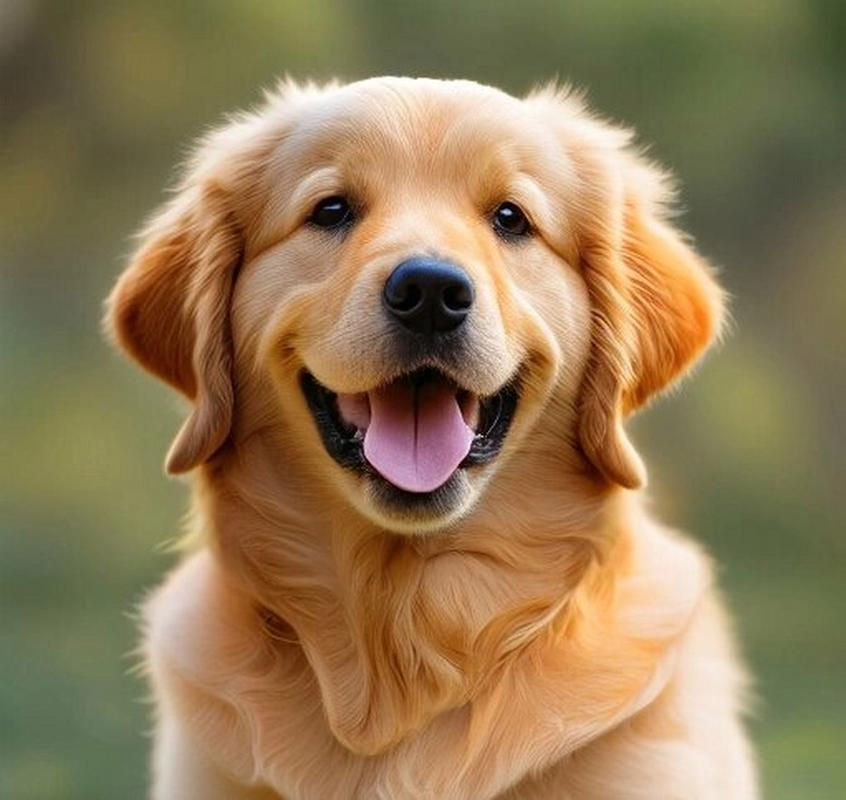

In [19]:
img

In [27]:
response

ChatAgentResponse(msgs=[BaseMessage(role_name='Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={}, content='这张图片是一只金毛寻回犬（Golden Retriever）的特写照片。金毛寻回犬是一种中大型犬种，以其友善、忠诚和易训练而闻名。它们通常具有金色或奶油色的被毛，这取决于具体的血统和基因。\n\n在这张照片中，金毛寻回犬的毛发看起来非常健康和有光泽，呈现出一种丰富的金黄色调。它的耳朵垂挂在头部两侧，眼睛明亮而有神，透露出一种友善和热情的表情。狗的嘴巴微微张开，舌头伸出来，这通常是狗狗感到快乐或兴奋时的表现。\n\n背景是模糊的，可能是一片自然景观，如公园或森林，这使得金毛寻回犬成为照片的焦点。整体的色彩调和温暖，给人一种温馨和愉悦的感觉。\n\n金毛寻回犬是一种非常受欢迎的宠物，不仅因为它们的外表美丽，还因为它们的性格温和，对人和其他动物都友好。它们经常被用作导盲犬、搜救犬和治疗犬等，因为它们具有高度的训练能力和愿意取悦主人的天性。\n\n这张照片捕捉到了金毛寻回犬的典型特征和魅力，展示了它们令人愉悦的外表和温暖的个性。无论是狗的爱好者还是普通人，看到这张照片都可能会被这只狗狗的可爱和友善所吸引。', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)], terminated=False, info={'id': 'chatcmpl-ed282e41-6a7a-9b46-af38-61b1c6ee3b4a', 'usage': {'completion_tokens': 280, 'prompt_tokens': 912, 'total_tokens': 1192, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'termination_reasons': ['stop'], 'num_tokens': 807, 'tool_calls': [], 'external_tool_call_requests

In [33]:
response.terminated

False

In [35]:
from camel.responses import ChatAgentResponse
from camel.messages import BaseMessage
from camel.types import RoleType

# 创建一个 ChatAgentResponse 实例
response = ChatAgentResponse(
    msgs=[
        BaseMessage(
            role_name="Assistant",  # 助手的角色名称
            role_type=RoleType.ASSISTANT,  # 指定角色类型
            content="你好，我可以帮您做什么？",  # 消息内容
            meta_dict={}  # 提供一个空的元数据字典（可根据需要填充）
        )
    ],  
    terminated=False,  # 会话未终止
    info={"usage": {"prompt_tokens": 10, "completion_tokens": 15}}  # 附加信息
)
response

ChatAgentResponse(msgs=[BaseMessage(role_name='Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={}, content='你好，我可以帮您做什么？', video_bytes=None, image_list=None, image_detail='auto', video_detail='low', parsed=None)], terminated=False, info={'usage': {'prompt_tokens': 10, 'completion_tokens': 15}})

In [42]:
#homework
##1.创建一个用户消息，并在 `meta_dict` 中增加若干条元数据（如用户偏好、语言设置等）。将该消息传递给 `ChatAgent`，观察系统在回答中是否有所变化。

from camel.agents import ChatAgent
from camel.models import ModelFactory
from camel.types import ModelPlatformType
from camel.messages import BaseMessage
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv('ModelFactory_Key')

model = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI_COMPATIBLE_MODEL,
    model_type="Qwen/QVQ-72B-Preview",
    url='https://api-inference.modelscope.cn/v1/',
    api_key=api_key
)

# 创建系统消息，告诉ChatAgent自己的角色定位
system_msg = "You are a helpful assistant that responds to user queries."

# 实例化一个ChatAgent
chat_agent = ChatAgent(model=model, system_message=system_msg,output_language='zh')


# 将用户消息传给ChatAgent，并获取回复
# user_msg = "Hello! Can you tell me something about CAMEL AI?"
# url1 = "https://img0.baidu.com/it/u=2205376118,3235587920&fm=253&fmt=auto&app=120&f=JPEG?w=846&h=800"
# url2 = "https://raw.githubusercontent.com/camel-ai/camel/master/misc/logo_light.png"
# img = Image.open(BytesIO(requests.get(url1).content))

user_msg = BaseMessage.make_user_message(
    role_name="user1",
    content="我叫BOb,你是？",
    meta_dict={"output_language": "English"}
)

response = chat_agent.step(user_msg)

print("Assistant Response:", response.msgs[0].content)

2025-08-31 09:05:04,745 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.
Assistant Response: 我是通义千问，一个由阿里云开发的语言模型。很高兴认识你！


In [45]:

chat_agent = ChatAgent(model=model, system_message=system_msg,output_language='zh')


user_msg = BaseMessage.make_user_message(
    role_name="user1",
    content="我是谁？",
    meta_dict={"output_language": "English"}
)

response = chat_agent.step(user_msg)

print("Assistant Response:", response.msgs[0].content)

2025-08-31 09:08:03,446 - root - WARNING - Invalid or missing `max_tokens` in `model_config_dict`. Defaulting to 999_999_999 tokens.
Assistant Response: 抱歉，我不太知道你是谁，帮不到你了。


In [51]:
from camel.types import OpenAIBackendRole

response_message = response.msgs[0].to_openai_assistant_message()
print(response_message)
print("\n")
response_message = response.msgs[0].to_openai_message(role_at_backend=OpenAIBackendRole.ASSISTANT)
print(response_message)

{'role': 'assistant', 'content': '抱歉，我不太知道你是谁，帮不到你了。'}


{'role': 'assistant', 'content': '抱歉，我不太知道你是谁，帮不到你了。'}
